In [1]:
import pandas as pd
import seaborn as sns 
import matplotlib as plt

url = "https://huggingface.co/datasets/Sp1786/multiclass-sentiment-analysis-dataset/resolve/main/train_df.csv"
df = pd.read_csv(url)
print(df.head(), df.shape)

      id                                               text  label sentiment
0   9536                    Cooking microwave pizzas, yummy      2  positive
1   6135  Any plans of allowing sub tasks to show up in ...      1   neutral
2  17697   I love the humor, I just reworded it. Like sa...      2  positive
3  14182                       naw idk what ur talkin about      1   neutral
4  17840          That sucks to hear. I hate days like that      0  negative (31232, 4)


In [2]:
df

,id,text,label,sentiment
0,9536,"Cooking microwave pizzas, yummy",2,positive
1,6135,Any plans of allowing sub tasks to show up in ...,1,neutral
2,17697,"I love the humor, I just reworded it. Like sa...",2,positive
3,14182,naw idk what ur talkin about,1,neutral
4,17840,That sucks to hear. I hate days like that,0,negative
...,...,...,...,...
31227,6265,Grrrr....I got the wrong size coat for the sheep,0,negative
31228,11284,4 cases of swine flu!,1,neutral
31229,6436,excellent,2,positive
31230,860,is sitting thru the boring bits in Titanic wai...,1,neutral


In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31232 entries, 0 to 31231
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         31232 non-null  int64 
 1   text       31232 non-null  object
 2   label      31232 non-null  int64 
 3   sentiment  31232 non-null  object
dtypes: int64(2), object(2)
memory usage: 976.1+ KB
None


In [4]:
print(df['sentiment'].value_counts)

<bound method IndexOpsMixin.value_counts of 0        positive
1         neutral
2        positive
3         neutral
4        negative
           ...   
31227    negative
31228     neutral
31229    positive
31230     neutral
31231    negative
Name: sentiment, Length: 31232, dtype: object>


In [5]:
print(df['text'].value_counts)

<bound method IndexOpsMixin.value_counts of 0                          Cooking microwave pizzas, yummy
1        Any plans of allowing sub tasks to show up in ...
2         I love the humor, I just reworded it. Like sa...
3                             naw idk what ur talkin about
4                That sucks to hear. I hate days like that
                               ...                        
31227     Grrrr....I got the wrong size coat for the sheep
31228                                4 cases of swine flu!
31229                                            excellent
31230    is sitting thru the boring bits in Titanic wai...
31231                                      Missed the play
Name: text, Length: 31232, dtype: object>


In [6]:
print(df.duplicated().sum())

0


C:\Users\heith\AppData\Local\Temp\ipykernel_6512\2679965509.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sentiment' ,palette='Set2')


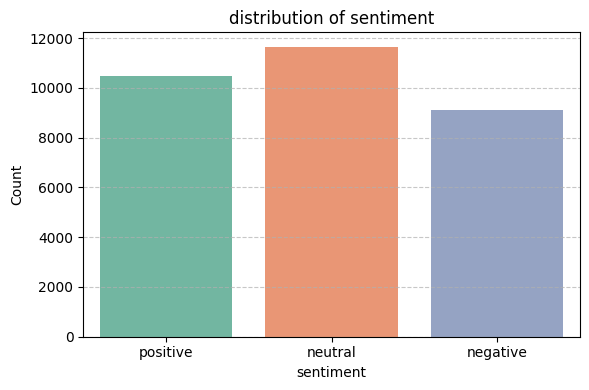

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='sentiment' ,palette='Set2')
plt.title('distribution of sentiment')
plt.ylabel('Count')
plt.xlabel('sentiment')
plt.grid(axis='y' , linestyle='--' , alpha=0.7)
plt.tight_layout()
plt.show()

In [8]:
# ضبط عرض الجمل بالكامل
pd.set_option('display.max_colwidth', None)

# تصفية الجمل الطويلة من النوع neutral
long_neutral = df[(df['sentiment'] == 'neutral') & (df['text'].str.split().str.len() > 25)]

# عرض أول 10 جمل
long_neutral[['text', 'sentiment']].head(10)

,text,sentiment
35,"Not as useful as Wunderlist... Yet!! Would prefer to have a tab for the ""week"". Not just day, that way I can anticipate. Also wish items would show up in my calendar.",neutral
66,"_peek mkay :/ did you tell him on msn? bfgurelgbsr yeah, i guess so, i don`t know if i like it, i`ll wait till i get your opinion",neutral
78,"Very nice, very simple, very usefull, but the free mode is too annoyingly limited. looking forward to having the ability to link habits with my wife or friends.",neutral
91,"The app is great, and I´ve started to use it rather than wunderlist. Just 3 stars because I don´t think the My Day section makes sense. Tasks flagged as to be done today, in others lists, should appear in My Day, as those are the tasks for Today, seems My Day only considers tasks added specifically to that list, and that makes it confusing and redundant, as in Planned, the right logic is applied, where you see planned tasks for today and ahead. Shouldn´t the same logic apply to the My Day window? Or I am doing something wrong?",neutral
97,It's really confusing! Its hadd to make routines and stuff. Just over all really confusing. But over great way to track routines. I love the tag idea. Mabey you should add a default school tag?,neutral
106,The layout for the app is awesome. But it would be better if non-routine task can be added into the timeline with the same activity for routine task.,neutral
109,My car is in the car hospital for the nxt 7 days I gotta go pick up a loaner car b4 6! Bein without wheels 4 7day will set me back heavy!,neutral
111,Only 24hr option? no 12. Would be cool if you could color code the circles in the calendar date to that calendar that has an event for that day.,neutral
115,"This task app is the only decent option I've found for combining tasks and calendar events into one scrollable widget. Tasks can be set to repeat from the date completed, which is essential for things like haircuts and cleaning schedules. Unfortunately, neither the app nor the widget (which is especially important) has many customization options. One option I would like, in particular, is the ability to hide the widget's title bar. Obviously color and display options would be nice, too.",neutral
127,It's actually good but it doesn't have a feature where your task appears on your lockscreen that will remind you everytime you forgot something to do.,neutral


In [9]:
import pandas as pd
import re

# دالة تنظيف النصوص
def clean_text(text):
    if not isinstance(text, str):
        return ""
    text = text.lower()
    # استبدال النقاط . وال= و ؟ و ! بمسافة
    text = re.sub(r'[.=؟!]', ' ', text)
    # حذف الأرقام
    text = re.sub(r'\d+', '', text)
    # حذف كل علامات الترقيم الأخرى (كل شيء ليس حرف أو رقم أو مسافة)
    text = re.sub(r'[^\w\sء-ي]', '', text)
    # حذف المسافات المتكررة وتحويلها لمسافة واحدة
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# إنشاء عمود جديد للنصوص النظيفة
df['cleaned_text'] = df['text'].apply(clean_text)

# عرض أول 5 صفوف للتأكد
print(df[['text', 'cleaned_text']].head())

                                                                                                                               text  \
0                                                                                                   Cooking microwave pizzas, yummy   
1                                                                         Any plans of allowing sub tasks to show up in the widget?   
2   I love the humor, I just reworded it. Like saying 'group therapy' instead`a 'gang banging'. Keeps my moms off my back.   Hahaha   
3                                                                                                      naw idk what ur talkin about   
4                                                                                         That sucks to hear. I hate days like that   

                                                                                                           cleaned_text  
0                                                                  

In [10]:
# عدد الأسطر التي cleaned_text فارغ أو null
empty_or_null_count = df['cleaned_text'].isnull().sum() + (df['cleaned_text'].str.strip() == '').sum()

print(f"عدد الأسطر التي cleaned_text فارغ أو null: {empty_or_null_count}")

عدد الأسطر التي cleaned_text فارغ أو null: 11


In [11]:
empty_or_null_rows = df[df['cleaned_text'].isnull() | (df['cleaned_text'].str.strip() == '')]

print(empty_or_null_rows[['text', 'cleaned_text']])

                  text cleaned_text
3986                 😍             
6865               🙄🙄🙄             
7403   😐😐😘😘😘😘😘😘😘😘😘😘😘😘😘             
13410               ♡♡             
22788             😶😶😶😶             
23166                💖             
24174                😀             
26336            👍👍😎😎😎             
29812                👍             
30022                🐂             
31009             ****             


In [12]:
df = df[~(df['cleaned_text'].isnull() | (df['cleaned_text'].str.strip() == ''))].reset_index(drop=True)

In [13]:
empty_or_null_rows = df[df['cleaned_text'].isnull() | (df['cleaned_text'].str.strip() == '')]

print(empty_or_null_rows[['text', 'cleaned_text']])

Empty DataFrame
Columns: [text, cleaned_text]
Index: []


In [14]:
print(df[['cleaned_text']].head(10))

                                                                                                           cleaned_text
0                                                                                        cooking microwave pizzas yummy
1                                                              any plans of allowing sub tasks to show up in the widget
2  i love the humor i just reworded it like saying group therapy insteada gang banging keeps my moms off my back hahaha
3                                                                                          naw idk what ur talkin about
4                                                                              that sucks to hear i hate days like that
5                                             umm yeah thats probably a pretty good note to self because eeeeeewwwwwwww
6                                                                                                  whatever do you mean
7               that would panic me a li

In [15]:
import pandas as pd
import re

# قائمة كلمات الضوضاء
noise_words = set([
    'hahaha', 'haha', 'hehe', 'lol', 'ugh', 'hmm', 'eww', 'ew',
    'ah', 'oh', 'mm', 'mmm', 'ha', 'hee', 'heehee', 'hoho',
    'huh', 'haah', 'hehehe'
])

# دالة التنظيف
def clean_text(text):
    if not isinstance(text, str):
        return ""

    text = text.lower()  # تحويل إلى أحرف صغيرة

    # تقليل الحروف المكررة (مثلاً: loooove → loove)
    text = re.sub(r'(.)\1{2,}', r'\1\1', text)

    # إزالة الضوضاء (noise words)
    words = text.split()
    words = [word for word in words if word not in noise_words]
    text = ' '.join(words)

    # إزالة النقاط وعلامات التوقف . = ؟ !
    text = re.sub(r'[.=؟!]', ' ', text)

    # إزالة الأرقام
    text = re.sub(r'\d+', '', text)

    # إزالة كل علامات الترقيم (ما عدا الحروف والأرقام والمسافات)
    text = re.sub(r'[^\w\sء-ي]', '', text)

    # إزالة المسافات الزائدة
    text = re.sub(r'\s+', ' ', text).strip()

    return text

# تطبيق الدالة على العمود نفسه
df['cleaned_text'] = df['cleaned_text'].astype(str).apply(clean_text)

# عرض مثال للتأكد
print(df[['cleaned_text']].head())

                                                                                                    cleaned_text
0                                                                                 cooking microwave pizzas yummy
1                                                       any plans of allowing sub tasks to show up in the widget
2  i love the humor i just reworded it like saying group therapy insteada gang banging keeps my moms off my back
3                                                                                   naw idk what ur talkin about
4                                                                       that sucks to hear i hate days like that


In [17]:
# حساب طول كل جملة في cleaned_text_final
df['text_length'] = df['cleaned_text'].apply(lambda x: len(x.split()))

# عرض الجمل التي تحتوي على أكثر من 100 كلمة (أو عدل العدد حسب حاجتك)
long_sentences = df[df['text_length'] > 100]

# عرض النتائج
print(f"عدد الجمل الطويلة جدًا: {len(long_sentences)}")
long_sentences[['cleaned_text', 'text_length']].head(10)  # عرض أول 10 منها

عدد الجمل الطويلة جدًا: 84


,cleaned_text,text_length
238,i downloaded this app on my tablet long time ago full version and recently also downloaded it on my phone as i dont bring my tablet with me all the time i only use the task function because my calendar events do not sync properly i havent fpnd the sync button on my phone and another not so funny thing for me i am using the same account for both devices but i cant use the full version on my phone i get a message that i need to buy it thats why i need to use my tablet with the full version on it if i want to add something,111
1040,requires account to use i was just giving a simple reason why i didnt like it but since your response indicates i dont have seconds then ill waist minutes to make you understand the point is that it requires an account i dont need another stinking account to keep track of a task list if i wanted to share on multiple devices i would just use any number of desktop applications that i already own i dont need another stinking program tracking my business in the sake of backing up my data or make it available everywhere i have that covered already just wanted a simple task list for a small price to use on my phone but without that choice no thanks to act as though seconds to give up my privacy is no big deal well my information and data is not your business or any one else unless i decide i want to do that that is what you need to understand some customers like to have options to do something and not have something stuffed down their throat downloaded tasks todo list and been happy with it donated to developer for making app for me and not their self,203
2151,well based on the description of this app and what i understood i would receive has not lived up to its description i hope the bugs will be worked out i emailed for help more than hours ago and have not received any response thus far it would be helpful to have a help andor faq section to refer to after only one day of using the app i have encountered the following from calendar screen button does not give option for project only event task or note i have the upgraded version settings general start with is set for day view but shows month instead help feedback only gives option to email for help no option to search for help when deleting an item in a series comma i do not get the option to just delete the one occurrence am i doing something wrong is there any help that i can expect to receive i paid for the upgraded version and i am not at all happy busy people with crazy schedules need a reliable app,178
2528,pretty cool its features are much better than the previous version however the widget shows up too many google play apps popup advertisements which is sometimes really irritating and takes my time for schedule planning i saw a review from the app developer maybe that problem could have been coming from other sources like my phone or google play app itselft or the like sorry for the comment that i have left even when i was not sure i thought that way because a lot of popups have ben shown when i was using this app sometimes gallery or photo app on my phone my phone is cheap but compact even sometimes show up ad maybe that could be the real cause of the problem,125
2578,i am apple transfer and i am yet to find am app for android with the same functionality as the built in ios app this one is ok but does not do what i need it to literally all i want an app to be able to do is have reminders pop up when scheduled then stay on the screen until they are completed this app will make the reminder pop up when scheduled but if i dont complete it by the end of the day it will not stay on my screen seems like i have to try and find a different app,104
3940,syncing with alexa takes over minutes which renders it unusable any do before you post your generic response yes i added the skill to my alexa and yes i logged into my accounts it syncs kind of so i can verify the two accounts are talking just not well at all when i use wunder

In [18]:
df

,id,text,label,sentiment,cleaned_text,text_length
0,9536,"Cooking microwave pizzas, yummy",2,positive,cooking microwave pizzas yummy,4
1,6135,Any plans of allowing sub tasks to show up in the widget?,1,neutral,any plans of allowing sub tasks to show up in the widget,12
2,17697,"I love the humor, I just reworded it. Like saying 'group therapy' instead`a 'gang banging'. Keeps my moms off my back. Hahaha",2,positive,i love the humor i just reworded it like saying group therapy insteada gang banging keeps my moms off my back,21
3,14182,naw idk what ur talkin about,1,neutral,naw idk what ur talkin about,6
4,17840,That sucks to hear. I hate days like that,0,negative,that sucks to hear i hate days like that,9
...,...,...,...,...,...,...
31216,6265,Grrrr....I got the wrong size coat for the sheep,0,negative,grr i got the wrong size coat for the sheep,10
31217,11284,4 cases of swine flu!,1,neutral,cases of swine flu,4
31218,6436,excellent,2,positive,excellent,1
31219,860,is sitting thru the boring bits in Titanic waiting for the good bit to start in couple of hours,1,neutral,is sitting thru the boring bits in titanic waiting for the good bit to start in couple of hours,19


In [19]:
df.drop(columns=['text_length'], inplace=True)

In [20]:
df

,id,text,label,sentiment,cleaned_text
0,9536,"Cooking microwave pizzas, yummy",2,positive,cooking microwave pizzas yummy
1,6135,Any plans of allowing sub tasks to show up in the widget?,1,neutral,any plans of allowing sub tasks to show up in the widget
2,17697,"I love the humor, I just reworded it. Like saying 'group therapy' instead`a 'gang banging'. Keeps my moms off my back. Hahaha",2,positive,i love the humor i just reworded it like saying group therapy insteada gang banging keeps my moms off my back
3,14182,naw idk what ur talkin about,1,neutral,naw idk what ur talkin about
4,17840,That sucks to hear. I hate days like that,0,negative,that sucks to hear i hate days like that
...,...,...,...,...,...
31216,6265,Grrrr....I got the wrong size coat for the sheep,0,negative,grr i got the wrong size coat for the sheep
31217,11284,4 cases of swine flu!,1,neutral,cases of swine flu
31218,6436,excellent,2,positive,excellent
31219,860,is sitting thru the boring bits in Titanic waiting for the good bit to start in couple of hours,1,neutral,is sitting thru the boring bits in titanic waiting for the good bit to start in couple of hours


In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from transformers import DistilBertTokenizerFast, DistilBertForSequenceClassification, Trainer, TrainingArguments
from transformers import DataCollatorWithPadding
import torch
from datasets import Dataset



# استخدام العمود cleaned_text و label
df = df[['cleaned_text', 'label']].dropna()

# تقسيم البيانات
train_texts, test_texts, train_labels, test_labels = train_test_split(
    df['cleaned_text'].tolist(), 
    df['label'].tolist(), 
    test_size=0.2, 
    random_state=42
)

# تحميل tokenizer
tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')

# ترميز النصوص
train_encodings = tokenizer(train_texts, truncation=True, padding=True, max_length=128)
test_encodings = tokenizer(test_texts, truncation=True, padding=True, max_length=128)

# تحويل البيانات إلى Dataset
train_dataset = Dataset.from_dict({
    'input_ids': train_encodings['input_ids'],
    'attention_mask': train_encodings['attention_mask'],
    'label': train_labels
})

test_dataset = Dataset.from_dict({
    'input_ids': test_encodings['input_ids'],
    'attention_mask': test_encodings['attention_mask'],
    'label': test_labels
})

# تحميل نموذج BERT خفيف
model = DistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=3)

# إعدادات التدريب
training_args = TrainingArguments(
    output_dir="./results",
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=1,
    eval_strategy="epoch",
    logging_dir="./logs",
    logging_steps=10,
    save_strategy="no",
    disable_tqdm=False,
    report_to="none"
)

# دالة حساب الدقة
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = torch.tensor(logits).argmax(dim=-1)
    return {"accuracy": accuracy_score(labels, predictions)}

# Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    tokenizer=tokenizer,
    data_collator=DataCollatorWithPadding(tokenizer),
    compute_metrics=compute_metrics
)

# تدريب النموذج
trainer.train()

# تقييم النموذج
results = trainer.evaluate()
print(f"\n✅ Accuracy: {results['eval_accuracy']:.4f}")

C:\Users\heith\miniconda3\envs\ai-env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
C:\Users\heith\AppData\Local\Temp\ipykernel_6512\1363205599.py:66: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(
C:\Users\heith\miniconda3\envs\ai-env\lib\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is 

Epoch,Training Loss,Validation Loss,Accuracy
1,0.724700,0.584056,0.752282


C:\Users\heith\miniconda3\envs\ai-env\lib\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)



✅ Accuracy: 0.7523
